In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *
from pycaret.datasets import get_data

from skopt import dummy_minimize, gp_minimize, forest_minimize

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from datetime import datetime

In [2]:
df = pd.read_csv('./data/df_final.csv')
df.shape

(14760, 48)

In [3]:
df_train = df.sample(frac=1, random_state=42) # Dados para treinamento
df_test = df.drop(df_train.index) # Dados para validacao

# Excluindo os demais registros
df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

print(f'Dados para modelagem: {df_train.shape}')
print(f'Dados reservados para a validação: {df_test.shape}')

Dados para modelagem: (14760, 48)
Dados reservados para a validação: (0, 48)


In [6]:
# Configurando o ambienteener
setup_01 = setup(data = df_train
                  , target = 'Class'
                  , session_id = 42
                  , train_size= 0.9
                  )

,Description,Value
0,Session id,42
1,Target,Class
2,Target type,Binary
3,Original data shape,"(14760, 48)"
4,Transformed data shape,"(14760, 48)"
5,Transformed train set shape,"(13284, 48)"
6,Transformed test set shape,"(1476, 48)"
7,Numeric features,47
8,Preprocess,True
9,Imputation type,simple


In [7]:
df_transformed = get_config('X_train')
df_transformed.shape

(13284, 47)

In [8]:
# Comparando os modelos
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9989,0.9998,0.9982,0.9955,0.9968,0.9962,0.9962,0.5860
et,Extra Trees Classifier,0.9989,0.9988,0.9982,0.9951,0.9966,0.9959,0.9960,0.2720
lightgbm,Light Gradient Boosting Machine,0.9989,0.9998,0.9982,0.9955,0.9968,0.9962,0.9962,0.1810
dt,Decision Tree Classifier,0.9919,0.9944,0.9982,0.9555,0.9764,0.9715,0.9719,0.0840
gbc,Gradient Boosting Classifier,0.9877,0.9973,0.9381,0.9872,0.9619,0.9545,0.9551,2.3120
ada,Ada Boost Classifier,0.9789,0.9963,0.9029,0.9689,0.9344,0.9219,0.9229,0.4590
ridge,Ridge Classifier,0.9718,0.0000,0.8509,0.9766,0.9093,0.8927,0.8957,0.0300
lda,Linear Discriminant Analysis,0.9713,0.9794,0.8523,0.9722,0.9081,0.8912,0.8940,0.0590
lr,Logistic Regression,0.9688,0.9687,0.8690,0.9391,0.9024,0.8838,0.8850,0.3960
nb,Naive Bayes,0.9432,0.9672,0.7055,0.9384,0.8046,0.7722,0.7835,0.0280


In [9]:
# Melhor modelo
model = best_model
print(model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


In [10]:
# Criando o modelo
rf = create_model('rf')
# Otimizando o modelo
rf_tuned = tune_model(rf, optimize='recall')
print(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9985,1.0000,1.0000,0.9911,0.9955,0.9946,0.9946
2,0.9970,0.9985,0.9820,1.0000,0.9909,0.9891,0.9892
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9977,1.0000,1.0000,0.9866,0.9933,0.9919,0.9919
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9992,0.9994,1.0000,0.9955,0.9977,0.9973,0.9973
7,0.9985,1.0000,1.0000,0.9910,0.9955,0.9946,0.9946
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9842,0.9995,0.9054,1.0000,0.9504,0.9410,0.9426
1,0.9910,0.9992,0.9505,0.9953,0.9724,0.9670,0.9673
2,0.9804,0.9979,0.8829,1.0000,0.9378,0.9262,0.9288
3,0.9887,0.9995,0.9324,1.0000,0.9650,0.9583,0.9591
4,0.9819,0.9990,0.9050,0.9852,0.9434,0.9327,0.9339
5,0.9797,0.9988,0.8778,1.0000,0.9349,0.9230,0.9257
6,0.9759,0.9976,0.8643,0.9896,0.9227,0.9085,0.9114
7,0.9864,0.9997,0.9276,0.9903,0.9579,0.9499,0.9506
8,0.9849,0.9972,0.9095,1.0000,0.9526,0.9437,0.9452


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


In [11]:
# Otimizando o modelo
model_tuned = tune_model(model, optimize='recall')
print(model_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9842,0.9995,0.9054,1.0000,0.9504,0.9410,0.9426
1,0.9910,0.9992,0.9505,0.9953,0.9724,0.9670,0.9673
2,0.9804,0.9979,0.8829,1.0000,0.9378,0.9262,0.9288
3,0.9887,0.9995,0.9324,1.0000,0.9650,0.9583,0.9591
4,0.9819,0.9990,0.9050,0.9852,0.9434,0.9327,0.9339
5,0.9797,0.9988,0.8778,1.0000,0.9349,0.9230,0.9257
6,0.9759,0.9976,0.8643,0.9896,0.9227,0.9085,0.9114
7,0.9864,0.9997,0.9276,0.9903,0.9579,0.9499,0.9506
8,0.9849,0.9972,0.9095,1.0000,0.9526,0.9437,0.9452


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


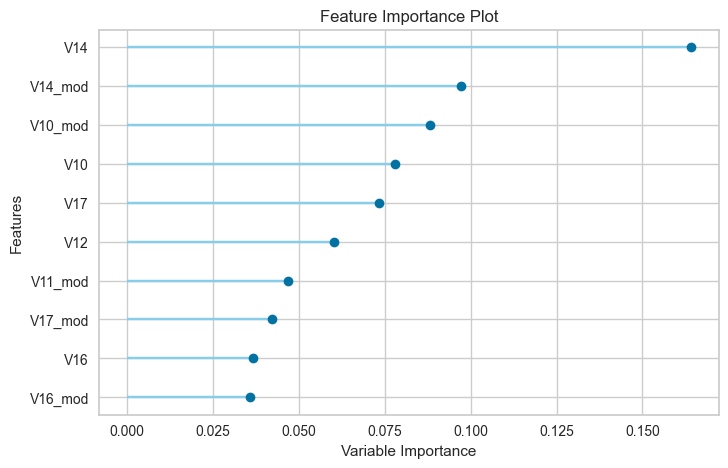

In [12]:
# Feature importance plot
plot_model(model_tuned, plot='feature')

In [13]:
evaluate_model(model_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

=== Dataframe ORIGINAL, sem balanceamento === 



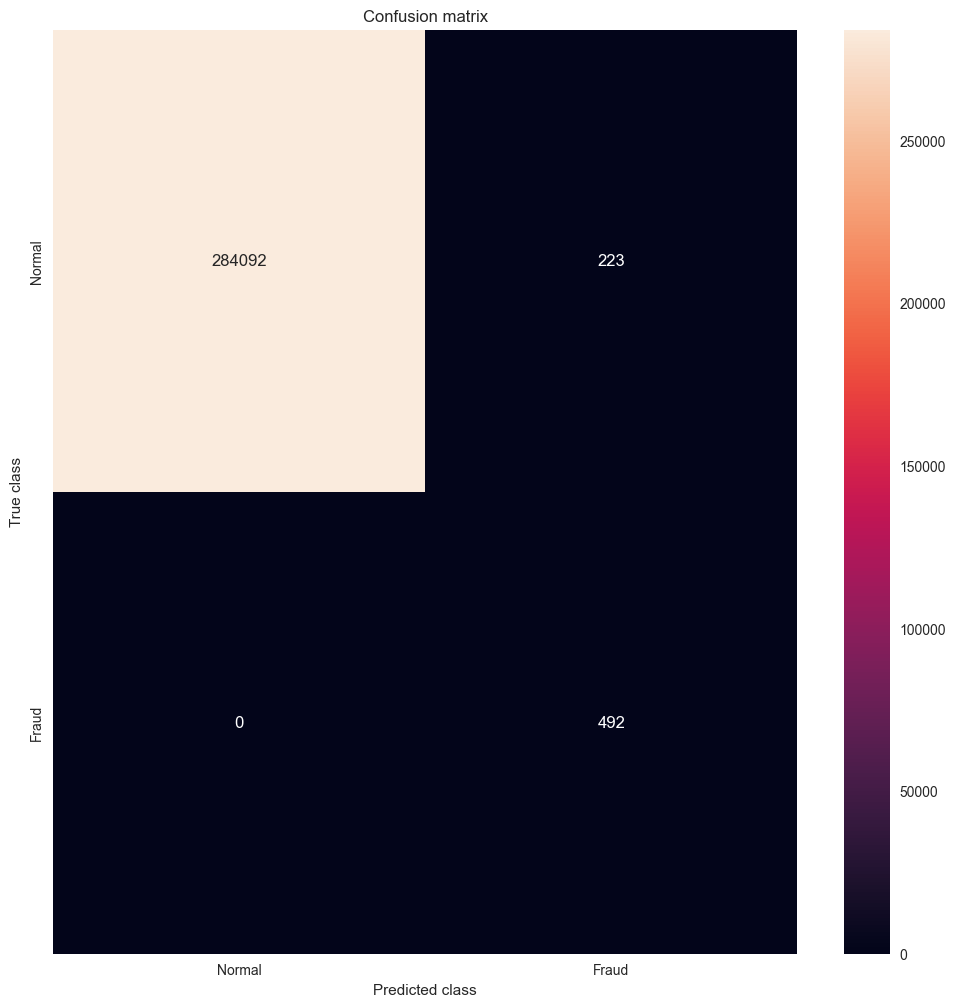

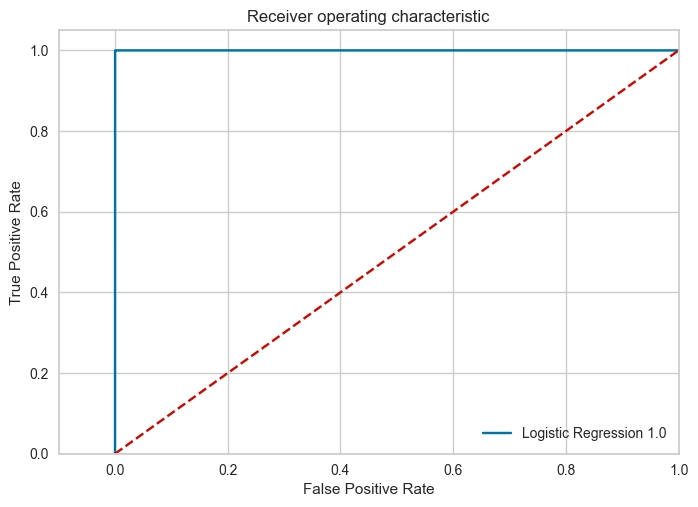

=== Dataframe ORIGINAL, sem balanceamento === 

A acurácia é 0.9992170136267718
A precisão é 0.6881118881118881
O recall é 1.0
O Score é 0.8152444076222037
O coeficiente de correlação é 0.8291997187234551


In [18]:
# Lendo o dataframe original e completo (sem balanceamento)
df_raw = pd.read_csv('./data/creditcard.csv')

# Criando as colunas no Dataframe original para aplicar o modelo
df_mod = df_raw.copy()
df_mod['V1_mod'] = df_mod.V1.map(lambda x: 1 if x < -3 else 0)
df_mod['V2_mod'] = df_mod.V2.map(lambda x: 1 if x > 2.5 else 0)
df_mod['V3_mod'] = df_mod.V3.map(lambda x: 1 if x < -3.5 else 0)
df_mod['V4_mod'] = df_mod.V4.map(lambda x: 1 if x > 2 else 0)
df_mod['V5_mod'] = df_mod.V5.map(lambda x: 1 if x < -4.5 else 0)
df_mod['V6_mod'] = df_mod.V6.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V7_mod'] = df_mod.V7.map(lambda x: 1 if x < -1.5 else 0)
df_mod['V9_mod'] = df_mod.V9.map(lambda x: 1 if x < -2 else 0)
df_mod['V10_mod'] = df_mod.V10.map(lambda x: 1 if x < -2 else 0)
df_mod['V11_mod'] = df_mod.V11.map(lambda x: 1 if x > 2 else 0)
df_mod['V12_mod'] = df_mod.V12.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V14_mod'] = df_mod.V14.map(lambda x: 1 if x < -2.5 else 0)
df_mod['V16_mod'] = df_mod.V16.map(lambda x: 1 if x < -2 else 0)
df_mod['V17_mod'] = df_mod.V17.map(lambda x: 1 if (x < -2) | (x > 2) else 0)
df_mod['V18_mod'] = df_mod.V18.map(lambda x: 1 if (x < -2) | (x > 2) else 0)
df_mod['V19_mod'] = df_mod.V19.map(lambda x: 1 if (x > 1.5) | (x < -1.75) else 0)
df_mod['V21_mod'] = df_mod.V21.map(lambda x: 1 if x > 0.3 else 0)

X_test = df_mod.drop(['Class'],axis=1)
y_test = df_mod['Class']
#model.fit(X_train, y_train)  # Treinando
y_pred = model_tuned.predict(X_test) # Predicao

# Calculando a matriz de confusão
from sklearn.metrics import confusion_matrix
print('=== Dataframe ORIGINAL, sem balanceamento === \n')
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Plotando a curva ROC e calculando a AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression {round(logit_roc_auc, 3)}')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
MCC = matthews_corrcoef(y_test, y_pred)

print('=== Dataframe ORIGINAL, sem balanceamento === \n')
print(f'A acurácia é {accuracy}')
print(f'A precisão é {precision}')
print(f'O recall é {recall}')
print(f'O Score é {f1}')
print(f'O coeficiente de correlação é {MCC}')

In [19]:
# Esta função treina o algoritmo e cria o modelo utilizando todo o conjunto de dados.
final_model = finalize_model(model_tuned)
print(model_tuned)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


In [22]:
# Adquirindo o nome do modelo
model_name = str(best_model).split('(')[0]
print(model_tuned)

# Adquirindo a data e hora exata
# now = datetime.now()

# Esta função realiza a persistencia do modelo em disco
save_model(model_tuned, f'./model/Final_Model_{model_name}')

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\marce\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Time', 'V1', 'V2', 'V3', 'V4',
                                              'V5', 'V6', 'V7', 'V8', 'V9',
                                              'V10', 'V11', 'V12', 'V13', 'V14',
                                              'V15', 'V16', 'V17', 'V18', 'V19',
                                              'V20', 'V21', 'V22', 'V23', 'V24',
                                              'V25', 'V26', 'V27', 'V28',
                                              'Amount', ...],
                                     transformer=SimpleImput...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
     

In [23]:
final = pd.read_pickle('model/Final_Model_RandomForestClassifier.pkl', compression='infer')

In [ ]:
%%bash
pip freeze > requirements.txt